<a href="https://colab.research.google.com/github/naveenkumar2306/TSF_tasks/blob/main/Task_2_prediction_using_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [NAVEENKUMAR N G](https://www.linkedin.com/in/naveenkumar-ng-25b9a0192)

### Task #2: Prediction using Unsupervised ML

### Collecting data

In [ ]:
# Import libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
# Create dataframe 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# To see target 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Data Analysing

In [ ]:
df.shape

(150, 4)

There are 150 rows and 4 columns in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Add species type(target) to our dataframe
df['species'] = iris.target

In [ ]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# To see the target names
target = iris.target_names
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# To see species name on dataframe
df['species name'] = df['species'].apply(lambda x: target[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# To see number of species on each type
df['species name'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species name, dtype: int64

There are 3 types of species. Each species contains 50 data.

#### To know more about our data, let's plot a scatter plot for both sepal and petal values to all types of species

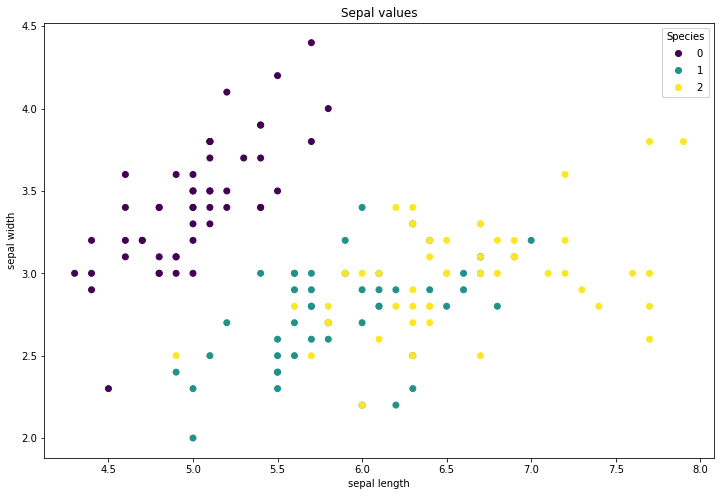

In [ ]:
# Based on sepal values
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
scatter = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df['species'])
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="upper right", title="Species")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal values', fontsize = 12)
ax.add_artist(legend)
plt.show()

Species1 & Species2 have more number of same size of sepal length and sepal width. That's why they mixed when we plot their sepal values on scatter plot

---

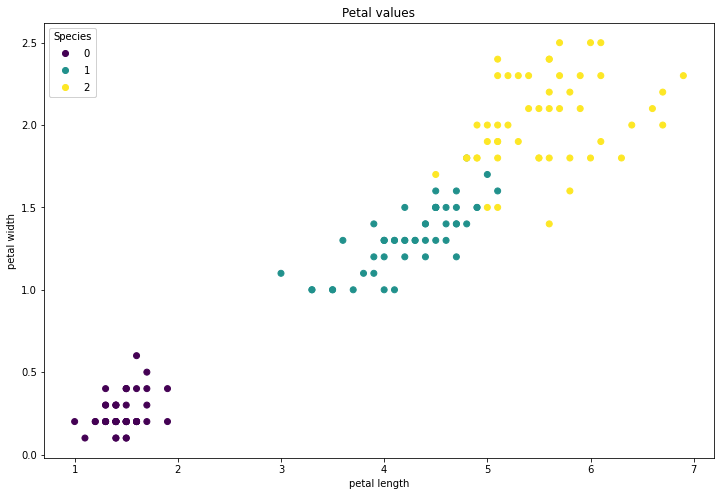

In [ ]:
# Based on petal values
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
scatter = ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['species'])
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="upper left", title="Species")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal values', fontsize = 12)
ax.add_artist(legend)
plt.show()

The above figure infers that each type of species has different petal size

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h4>From above two figures, we can say second one(Petal values) easy to classify.</h4>
<h4>So We 'll go with petal values for classification</h4>
</div>

---

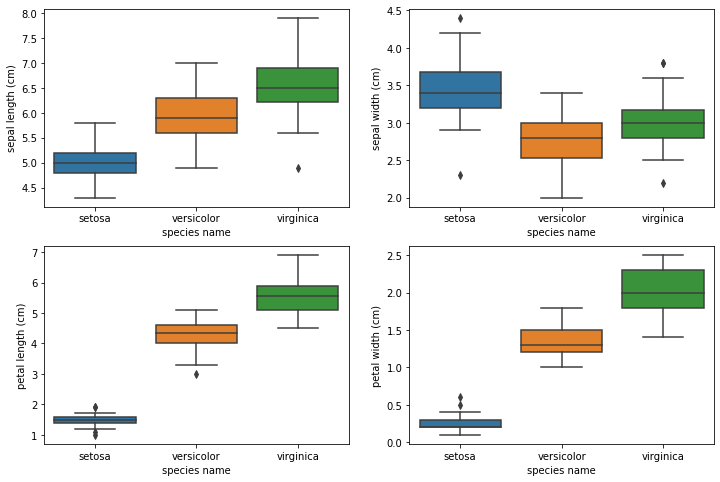

In [ ]:
# To see all the values based on species in boxplot 
f, axes = plt.subplots(2, 2)
sns.boxplot(  y="sepal length (cm)", x= "species name", data=df, ax=axes[0, 0])
sns.boxplot(  y="sepal width (cm)", x= "species name", data=df, ax=axes[0, 1])
sns.boxplot(  y="petal length (cm)", x= "species name", data=df,  ax=axes[1, 0])
sns.boxplot(  y="petal width (cm)", x= "species name", data=df, ax=axes[1, 1])
plt.show()

The above figure infers that <br>**setosa < versicolor < virginica** in all values(sepal length, petal length, petal width) **except sepal width**.<br>In size of sepal width setosa is higher than versicolor and virginica

### Data Wrangling

In [ ]:
# To see null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species name         0
dtype: int64

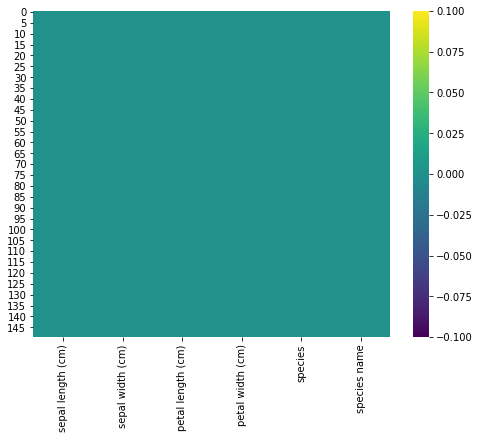

In [ ]:
# To see visually
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cmap = 'viridis')

There is no **null values** in the data.

### Choosing The Right Number Of Clusters

In [ ]:
# Import library
from sklearn.cluster import KMeans

To know the number of cluster:<br>We have to **calculate: Within-Cluster-Sum-of-Squares(WCSS)**. 

### WCSS = $\sum_{C_k}^{C_n}(\sum_{d_i in C_i}^{d_m} distance(d_i, c_k)^{2}$)

c - cluster centroid<br>d - datapoint in each cluster

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [ ]:
wcss = []
k_range = range(1, 11)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

**elbow method** is used to determine the number of clusters in a data set

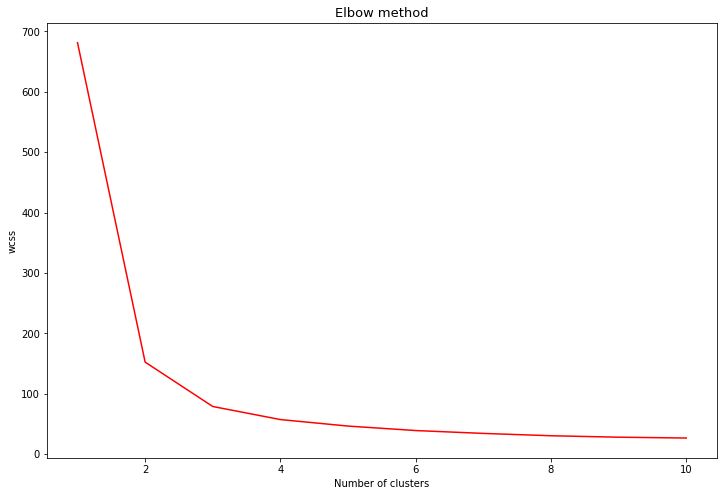

In [ ]:
# plot the wcss values(elbow method)
plt.plot(k_range, wcss, c = 'red')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('Elbow method', fontsize = 13)
plt.show()

The above figure infers that the elbow shape formed at 3 so **k = 3**

### Implement K-Means clustering 

In [ ]:
# Apply kmeans to data
km  = KMeans(n_clusters=3)
pred = km.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
# To see cluster center
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

As we mentioned above we use **petal values(x[2, 3]) for classification**

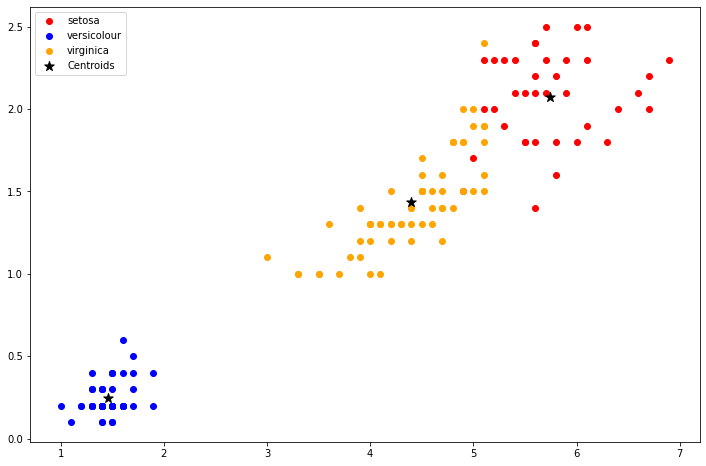

In [ ]:
# Visualising the clusters - On the second two columns
plt.scatter(x[pred == 0, 2], x[pred == 0, 3], c = 'red', label = 'setosa')
plt.scatter(x[pred == 1, 2], x[pred == 1, 3], c = 'blue', label = 'versicolour')
plt.scatter(x[pred == 2, 2], x[pred == 2, 3], c = 'orange', label = 'virginica')
# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 100, c = 'black', marker = '*', label = 'Centroids')
plt.legend()
plt.show()